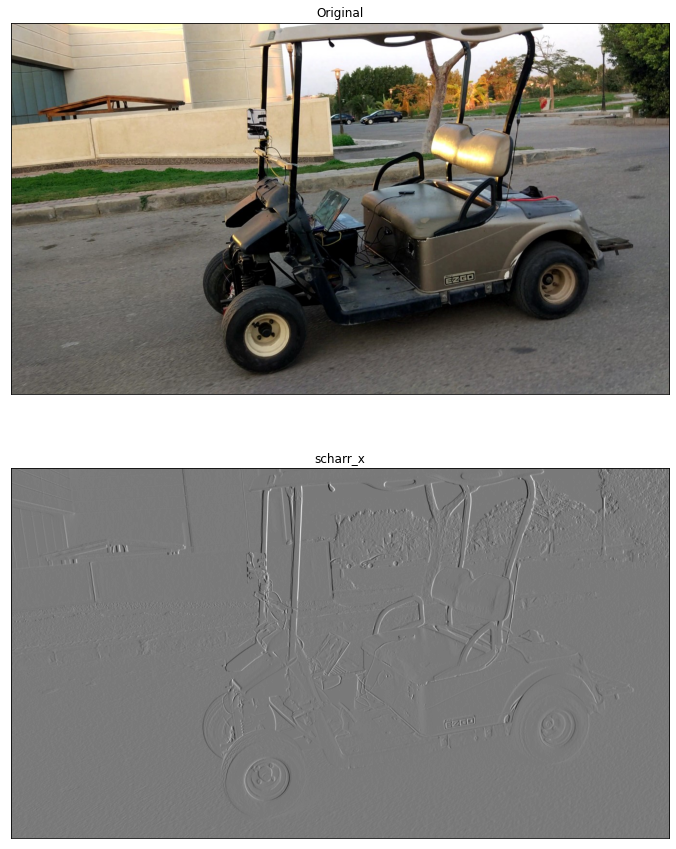

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt




img = cv2.imread('../Files/001.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img_scharr_x = cv2.Scharr(gray, cv2.CV_64F, 1, 0)

plt.figure(figsize=(30,15), facecolor=(1, 1, 1))

plt.subplot(2,1,1),plt.imshow(img[:,:,::-1])

plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,1,2),plt.imshow(img_scharr_x,cmap = 'gray')
plt.title('scharr_x'), plt.xticks([]), plt.yticks([])
plt.show();



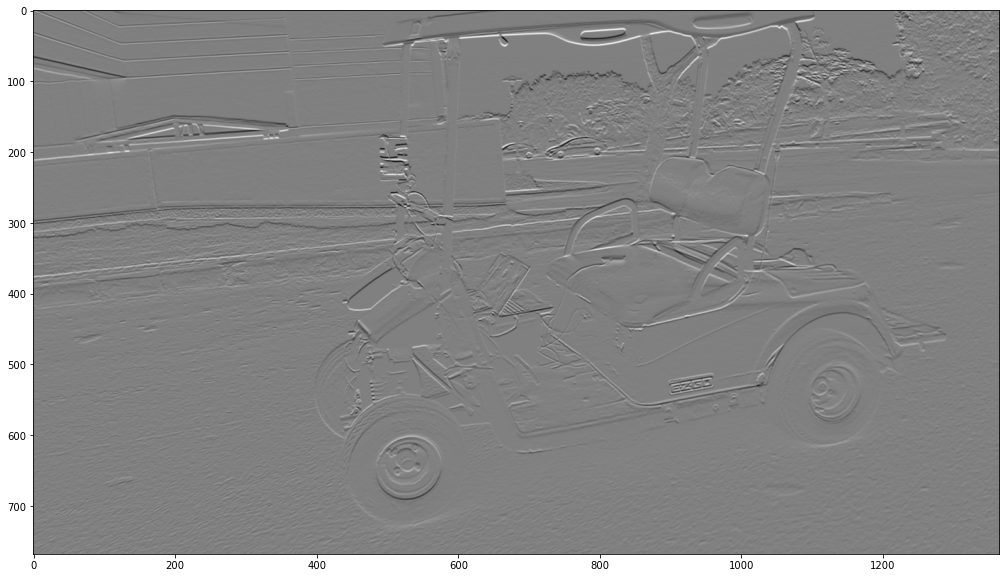

In [22]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image

cv2.namedWindow('Image',cv2.WINDOW_NORMAL)

def show(img):
    if (len(img.shape) == 2):
        display(Image.fromarray(img));    
    else:
        display(Image.fromarray(img[:,:,::-1]));


img = cv2.imread('../Files/001.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img_scharr_y = cv2.Scharr(gray, cv2.CV_64F, 0, 1)

plt.figure(figsize=(25,10))
plt.imshow(img_scharr_y, cmap='gray');


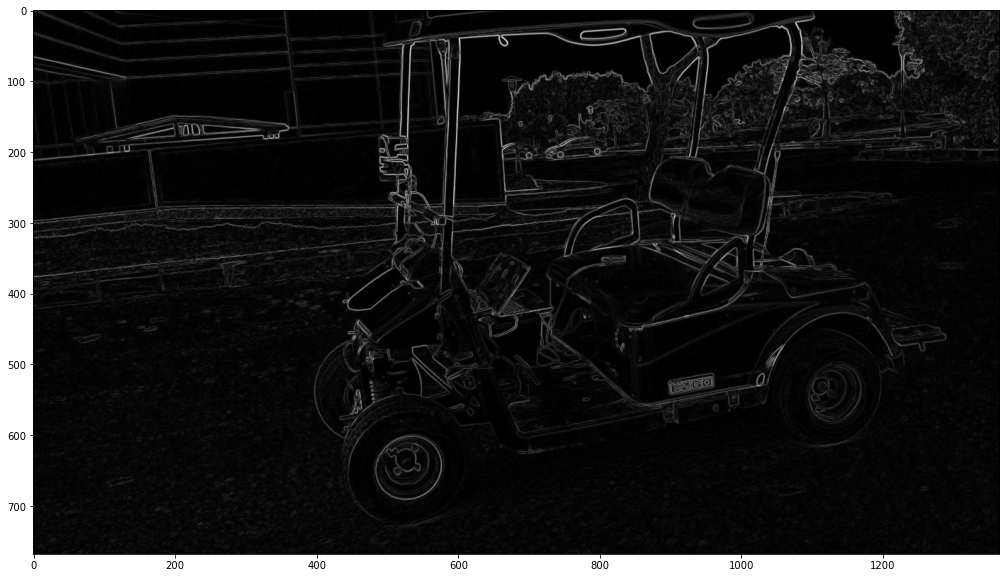

In [23]:
#getting magnitude  for scarr 
import math  

f_img = np.power((img_scharr_x**2) +(img_scharr_y**2) , .5)

plt.figure(figsize=(25,10))
plt.imshow(f_img, cmap='gray');

    

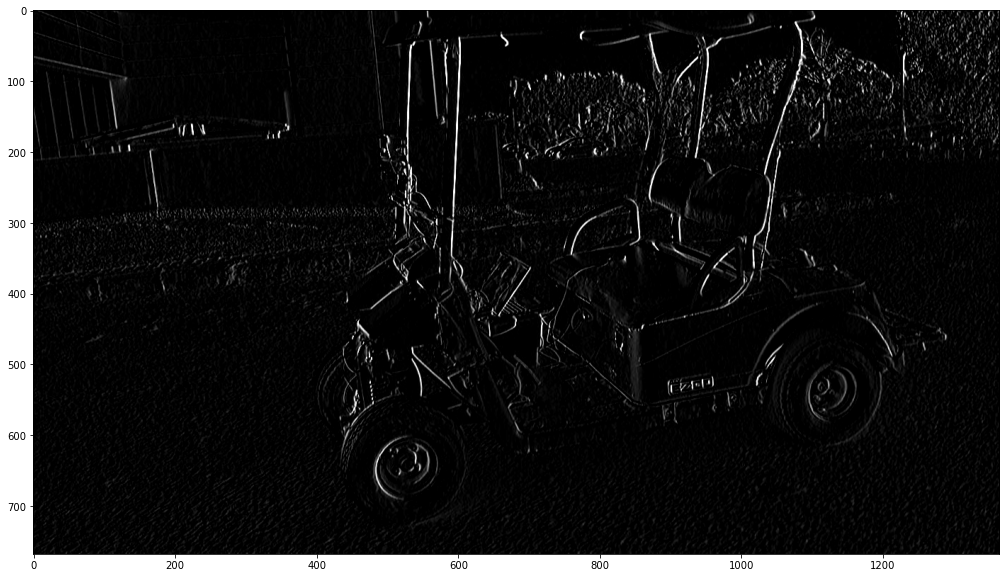

In [25]:
#perwit 


per = np.array([[ -1, 0, 1], 
                    [ -1, 0, 1], 
                    [ -1, 0, 1]])

filtered_image1 = cv2.filter2D(gray, -1, per)

plt.figure(figsize=(25,10))
plt.imshow(filtered_image1, cmap='gray');

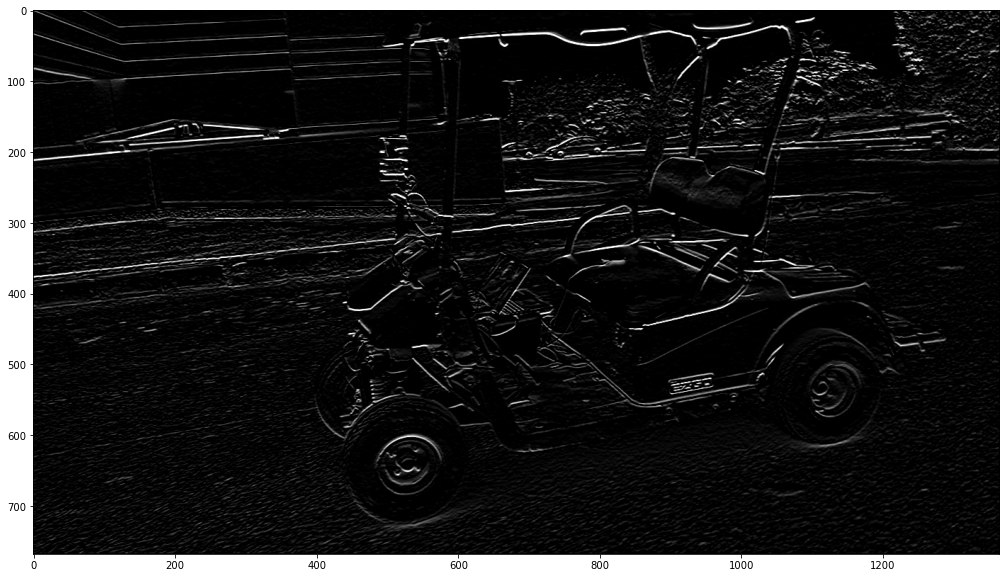

In [26]:
per = np.array([[ -1, -1, -1], 
                [ 0, 0, 0], 
                [ 1, 1, 1]])

filtered_image = cv2.filter2D(gray, -1, per)

plt.figure(figsize=(25,10))
plt.imshow(filtered_image, cmap='gray');

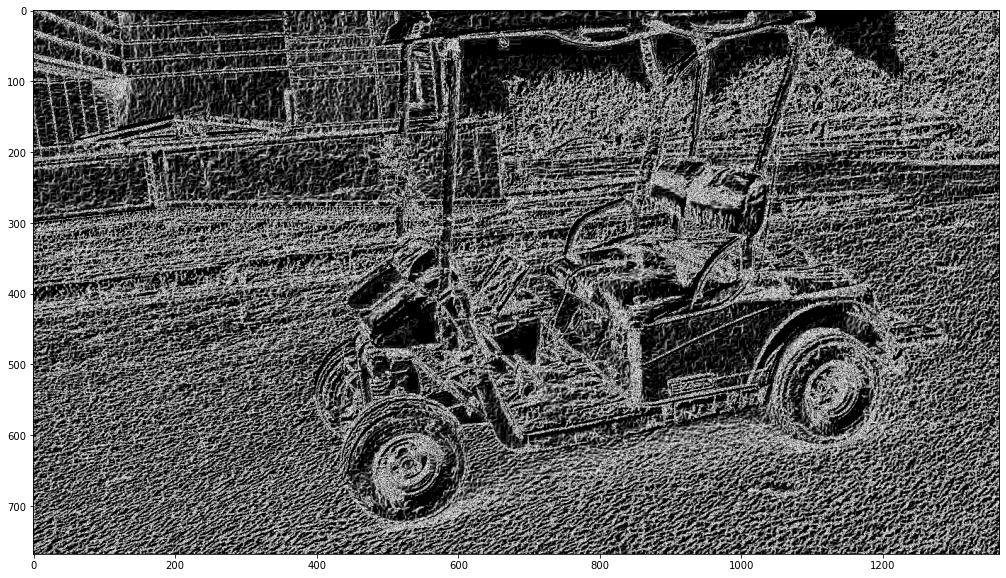

In [27]:
#getting magnitude  for per 


f_img = np.power((filtered_image1**2) +(filtered_image **2) , .5)

plt.figure(figsize=(25,10))
plt.imshow(f_img, cmap='gray');

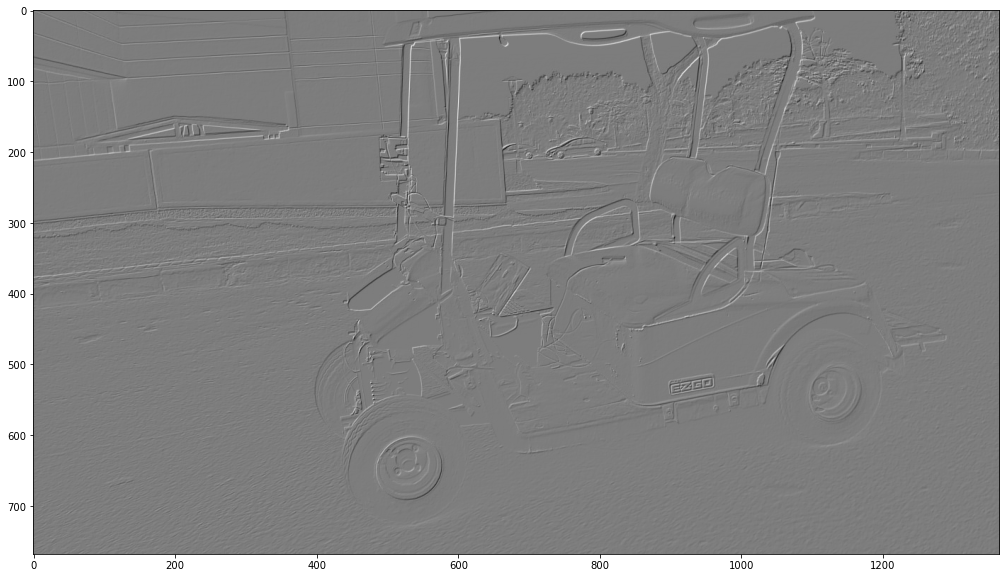

In [34]:
# Roberts operator  x
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)

x = cv2.filter2D(gray, cv2.CV_16S, kernelx)

plt.figure(figsize=(25,10))
plt.imshow(x, cmap='gray');




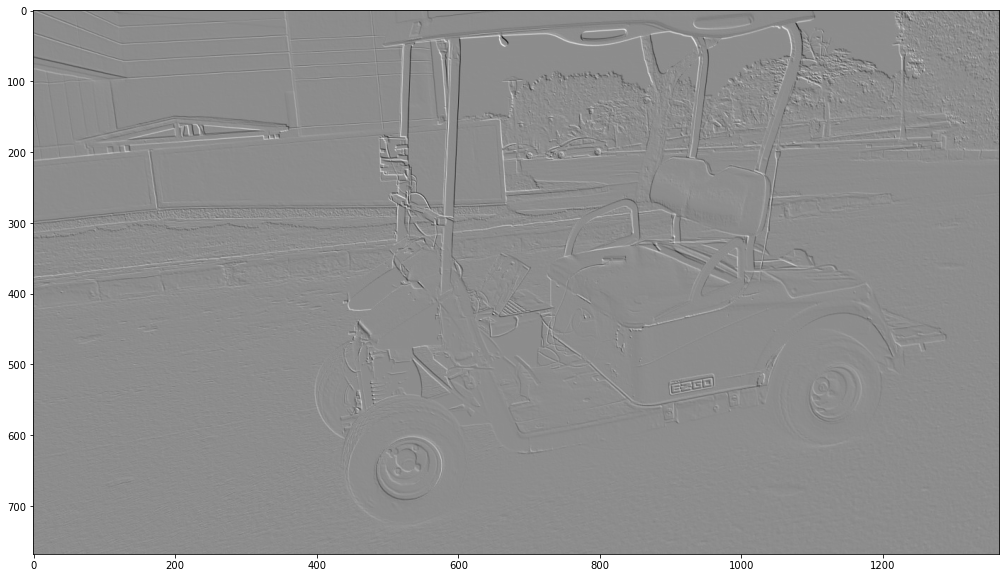

In [33]:
# Roberts operator  y
cv2.namedWindow('Image1',cv2.WINDOW_NORMAL)
img = cv2.imread('../Files/001.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernely = np.array([[0, -1], [1, 0]], dtype=int)


y = cv2.filter2D(gray, cv2.CV_16S, kernely)


plt.figure(figsize=(25,10))
plt.imshow(y, cmap='gray');



<ipython-input-32-269008c03b3c>:4: RuntimeWarning: invalid value encountered in power
  f_img = np.power((x**2) +(y**2) , .5)


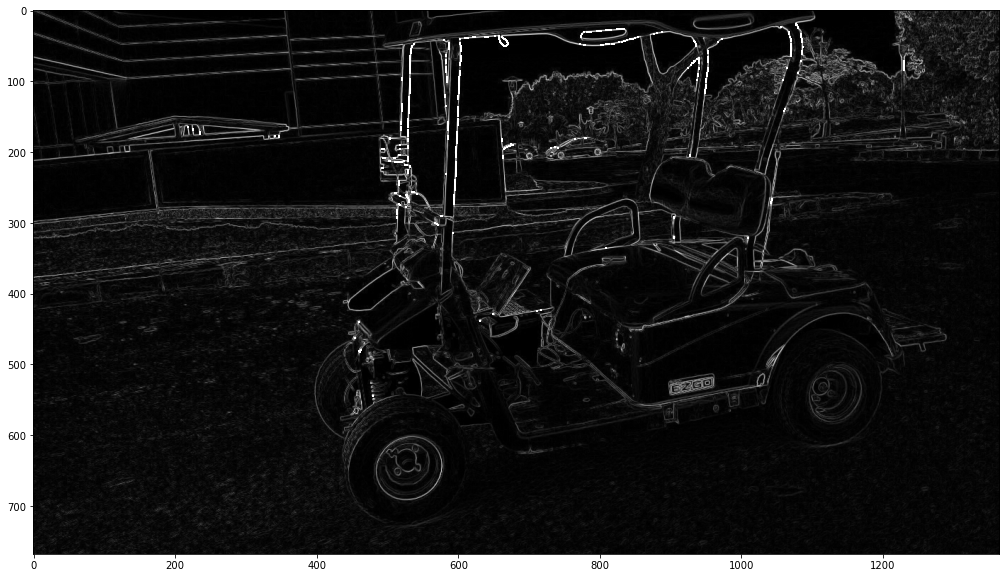

In [32]:
#getting magnitude  for robert


f_img = np.power((x**2) +(y**2) , .5)

plt.figure(figsize=(25,10))
plt.imshow(f_img, cmap='gray');

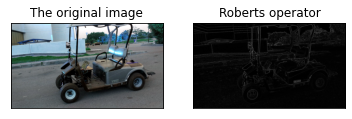

In [38]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

titles = ['The original image', 'Roberts operator']
images = [img, Roberts]



for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()
